<h1>This notebook will look at the following discrete probability distributions and example applications:</h1>
<h2>Binomial</h2>
<h2>Poisson</h2>

In [1]:
#just a side note. If you need to check what version of a library you are using
#you can access the __version__ attribute. You may be able to check via a package manager
#but you should be aware that it is possible to have conflicting versions installed on a system and
#checking within code tells you definitively which is being accessed
import scipy
print(scipy.__version__)

1.9.1


In [2]:
from scipy.stats import binom
#calculate binomial probability for cumulative probability of 2 or fewer heads in five flips of a fair (.5 probability) coin
#note that wer using cdf() for cumulative probability as we want the odds of 2 "or fewer", not the odds of exactly 2
#k = number of "successes" we are calculating for 
#n = number of trials (coin flips)
#p = the probability of a success in any trial (remember, this is a fair coin with equal odds for heads or tails)
binom.cdf(k=2, n=5, p=0.5)

0.5

In [3]:
#calculate binomial probability for cumulative probability of exactly 2 heads in five flips of a fair (.5 probability) coin
#note that we are using pmf() for the probability mass function, as we want the odds of exactly 2
#k = number of "successes" we are calculating for 
#n = number of trials (coin flips)
#p = the probability of a success in any trial (remember, this is a fair coin with equal odds for heads or tails)
binom.pmf(k=2, n=5, p=0.5)

0.31249999999999983

<h2>More relevant example:</h2>
Fair coin tosses (50/50 odds) are an easy example, but not particularly relevant
Consider known probability of product failure (.10) in a particular, complicated manufacturing process (meaning we have to plan the size of the manufacturing run in advance, not check each unit as it comes off the line and stop when we have enough). Over production is prohibitively costly, but underproduction for forecasted demand (800) must be avoided.
A .95 probability of achieving goal is considered acceptable risk.
How many units do we need to plan for production to achieve this?


In [4]:
from scipy.stats import binom
#calculate binomial probability
desired_count = 800
desired_probability = .95
#we initialize the run_count to the desired_count as we know that even
#with no failures, we would need to produce this many
run_count = desired_count
x = 0
while x < desired_probability:
    run_count = run_count + 1
    #we are subtracting the probability of achieving "up to" the desired count minus one, from one as that gives us the
    #probability of getting at least the desired count (remember, all probabilities must add to 1). The Poisson calculates 
    #up to infinite occurences, so we have to use the complement probability. Similarly, we were told the probability of failure 
    #(i.e., 'q' in binomial parlance) for any given piece was was .1, therefore probability of success ("p") must be .9
    x = 1 - binom.cdf(k=(desired_count-1), n=run_count, p=.90)
print("For a run count of {}, the probability of achieving a success rate of {} is {}."
      .format(run_count,desired_count,x))    



For a run count of 906, the probability of achieving a success rate of 800 is 0.9584053629674504.


<h2>Poisson Distribution:</h2>
Using the Poisson distribution, if new cases of West Nile Virus in New England are occurring at a rate of about 2 per month, then let’s calculate the probabilities that: 0,1, 2, 3, 4, or 5 cases will occur in New England in the next month…


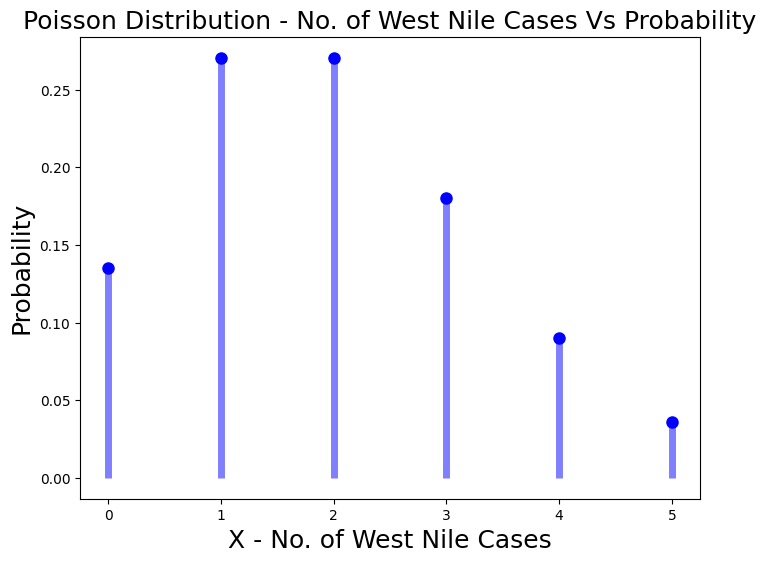

In [5]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
#
# Random variable representing number of West Nile Cases
# lambda = Mean number of occurrences of cases in New England
#(note: "lambda" is a keyword in Python so for the poisson lambda variable we are naming it lmbda)
#
X = [0, 1, 2, 3, 4, 5]
lmbda = 2
#calculate the probability mass function
poisson_pd = poisson.pmf(X, lmbda)
#now plot it
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of West Nile Cases", fontsize="18")
plt.title("Poisson Distribution - No. of West Nile Cases Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

In [6]:
import pandas as pd
df = pd.DataFrame()
df['X'] = X
df['P(X)'] = poisson_pd
df

,X,P(X)
0,0,0.135335
1,1,0.270671
2,2,0.270671
3,3,0.180447
4,4,0.090224
5,5,0.036089
